# Hypothesis Test - Lab

## Introduction

In this lab, you'll have the opportunity to decide to pick the variables that you want to perform one and two sample t-tests.

## Objectives

You will be able to:

* Construct and interpret a confidence interval for a single mean
* Perform a hypothesis test for a single mean
* Construct and interpret a confidence interval for two independent means
* Perform a hypothesis test for two independent means


## The Data: Last Words of Death Row Inmates

On Kaggle there is a famous data set of *[Last Words of Death Row Inmates](https://www.kaggle.com/datasets/mykhe1097/last-words-of-death-row-inmates)*. While this data set is often used for natural language processing, we'll use the non-text data for statistical inference on one and two means using the t-distribution.

### Data Dictionary

The dataset consists of 545 observations with 21 variables. They are:

* `Execution`: The order of execution, numeric.
* `LastName`: Last name of the offender, character.
* `FirstName`: First name of the offender, character.
* `TDCJNumber`: TDCJ Number of the offender, numeric.
* `Age`: Age of the offender, numeric.
* `Race`: Race of the offender, categorical : Black, Hispanic, White, Other.
* `CountyOfConviction`: County of conviction, character.
* `AgeWhenReceived`: Age of offender when received, numeric.
* `EducationLevel`: Education level of offender, numeric.
* `NativeCounty`: Native county of offender, categorical : 0 = Within Texas, 1= Outside Texas.
* `PreviousCrime`: Whether the offender committed any crime before, categorical: 0= No, 1= Yes.
* `Codefendants`: Number of co-defendants, numeric.
* `NumberVictim`: Number of victims, numeric.
* `WhiteVictim`, `HispanicVictim`, `BlackVictim`, `VictimOtherRace` `FemaleVictim`, `MaleVictim`: Number of victims with specified demographic features, numeric.
* `LastStatement`: Last statement of offender, character.

The [data file](https://github.com/learn-co-curriculum/dsc-hypothesis-testing-ent/blob/main/data/texas.csv) that we'll be using has the first 20 variables, i.e. we're excluding the `LastStatement` variable.

*N.B.*: Note this data is from 1982 - 2017 and for that time period the data is exhaustive.

## Preliminary Steps

As usual, begin with importing the Python libraries that you will need. Then bring in the data and explore it.

You'll likely want to use `scipy.stats`. If you want to use `confidence_interval(confidence_level=0.95)` with [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html), then you need to have `scipy` version 1.11.0.

In [60]:

# Only do this if necessary
! pip install scipy==1.11.0

ERROR: Could not find a version that satisfies the requirement scipy==1.11.0 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0, 1.4.1, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4, 1.6.0, 1.6.1, 1.6.2, 1.6.3, 1.7.0, 1.7.1, 1.7.2, 1.7.3, 1.8.0rc1, 1.8.0rc2, 1.8.0rc3, 1.8.0rc4, 1.8.0, 1.8.1, 1.9.0rc1, 1.9.0rc2, 1.9.0rc3, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0rc1, 1.10.0rc2, 1.10.0, 1.10.1)
ERROR: No matching distribution found for scipy==1.11.0


In [76]:

__requires__= 'scipy==11.1.0'

# Bring in germane libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np

scipy.__version__

'1.5.0'

In [77]:
# Read data into dataframe
df = pd.read_csv('data/texas.csv', index_col=0)

Now that you have brought in the data. Consider these or similar commands to get a feel for the data.
* `.info()`
* `.head()`



In [78]:
# Get DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, Cardenas to Brooks, Jr.
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FirstName           383 non-null    object
 1   TDCJNumber          383 non-null    int64 
 2   Age                 383 non-null    int64 
 3   Race                383 non-null    object
 4   CountyOfConviction  383 non-null    object
 5   AgeWhenReceived     383 non-null    int64 
 6   EducationLevel      383 non-null    int64 
 7   NativeCounty        383 non-null    int64 
 8   PreviousCrime       383 non-null    int64 
 9   Codefendants        383 non-null    int64 
 10  NumberVictim        383 non-null    int64 
 11  WhiteVictim         383 non-null    int64 
 12  HispanicVictim      383 non-null    int64 
 13  BlackVictim         383 non-null    int64 
 14  VictimOther.Races   383 non-null    int64 
 15  FemaleVictim        383 non-null    int64 
 16  MaleVictim      

In [79]:
# head
df.head()

,FirstName,TDCJNumber,Age,Race,CountyOfConviction,AgeWhenReceived,EducationLevel,NativeCounty,PreviousCrime,Codefendants,NumberVictim,WhiteVictim,HispanicVictim,BlackVictim,VictimOther.Races,FemaleVictim,MaleVictim
LastName,,,,,,,,,,,,,,,,,
Cardenas,Ruben,999275,47,Hispanic,Hidalgo,28,11,1,0,0,1,0,1,0,0,1,0
Pruett,Robert,999411,38,White,Bee,22,8,0,1,0,1,1,0,0,0,0,1
Preyor,Taichin,999494,46,Black,Bexar,34,10,0,0,0,1,1,0,0,0,0,1
Bigby,James,997,61,White,Tarrant,36,9,0,1,0,1,1,0,0,0,0,1
Ruiz,Rolando,999145,44,Hispanic,Bexar,22,10,0,1,4,1,0,1,0,0,1,0


### Preprocessing

While there are a number of preprocessing steps you may choose to make, at the very least you should do the following.

Based on the data dictionary and how the data is interpreted by Numpy, convert any non-numeric data into the proper form. Verify that your code worked correctly.

In [80]:
# Use the map function to change the two variables
object_columns = df.select_dtypes(include = 'object').columns
mappings = {}

for col in object_columns:
    unique_values = df[col].unique()
    col_mapping = {value: idx for idx, value in enumerate(unique_values, start = 1)}
    mappings[col] = col_mapping
    df[col] = df[col].map(col_mapping)


In [81]:
# Verify this was done correctly
# head
df.head()

,FirstName,TDCJNumber,Age,Race,CountyOfConviction,AgeWhenReceived,EducationLevel,NativeCounty,PreviousCrime,Codefendants,NumberVictim,WhiteVictim,HispanicVictim,BlackVictim,VictimOther.Races,FemaleVictim,MaleVictim
LastName,,,,,,,,,,,,,,,,,
Cardenas,1,999275,47,1,1,28,11,1,0,0,1,0,1,0,0,1,0
Pruett,2,999411,38,2,2,22,8,0,1,0,1,1,0,0,0,0,1
Preyor,3,999494,46,3,3,34,10,0,0,0,1,1,0,0,0,0,1
Bigby,4,997,61,2,4,36,9,0,1,0,1,1,0,0,0,0,1
Ruiz,5,999145,44,1,3,22,10,0,1,4,1,0,1,0,0,1,0


In [82]:
# Verify this was done correctly
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, Cardenas to Brooks, Jr.
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   FirstName           383 non-null    int64
 1   TDCJNumber          383 non-null    int64
 2   Age                 383 non-null    int64
 3   Race                383 non-null    int64
 4   CountyOfConviction  383 non-null    int64
 5   AgeWhenReceived     383 non-null    int64
 6   EducationLevel      383 non-null    int64
 7   NativeCounty        383 non-null    int64
 8   PreviousCrime       383 non-null    int64
 9   Codefendants        383 non-null    int64
 10  NumberVictim        383 non-null    int64
 11  WhiteVictim         383 non-null    int64
 12  HispanicVictim      383 non-null    int64
 13  BlackVictim         383 non-null    int64
 14  VictimOther.Races   383 non-null    int64
 15  FemaleVictim        383 non-null    int64
 16  MaleVictim          383 non-null  

### EDA

Now perform Exploratory Data Analysis of at least three variables of your choosing. You should look at both descriptive statistics and visualizations.

In [83]:
# EDA code sample
# describe
print(df['Age'].describe())
print(df['EducationLevel'].describe())
print(df['NumberVictim'].describe())

count    383.000000
mean      39.373368
std        8.653542
min       24.000000
25%       33.000000
50%       38.000000
75%       44.000000
max       67.000000
Name: Age, dtype: float64
count    383.000000
mean      10.182768
std        2.071501
min        0.000000
25%        9.000000
50%       10.000000
75%       12.000000
max       16.000000
Name: EducationLevel, dtype: float64
count    383.000000
mean       1.394256
std        0.761418
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: NumberVictim, dtype: float64


In [84]:
# EDA code sample
# Count the number of each race

raceCount = df['Race'].value_counts()
raceCount

2    179
3    130
1     73
4      1
Name: Race, dtype: int64

In [85]:
df['Age'].value_counts()

38    22
32    21
33    21
40    19
30    17
34    17
42    17
39    17
37    16
43    16
36    15
41    15
29    14
31    14
28    12
35    12
46    12
27    11
47    10
48     9
44     9
51     6
54     6
45     6
49     5
50     5
52     4
53     4
55     4
58     4
59     4
57     3
61     3
26     2
62     2
25     2
56     2
67     1
66     1
60     1
64     1
24     1
Name: Age, dtype: int64

Text(0, 0.5, 'Count')

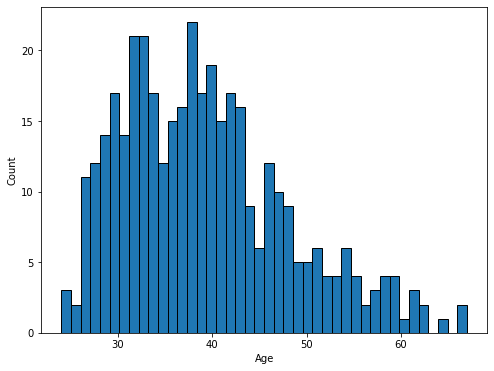

In [86]:
# EDA code sample
# Plot age (use histogram)
plt.figure(figsize = (8,6))
plt.hist(df['Age'], bins = len(df['Age'].value_counts()), edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Count')

## Statistical Inference

### One mean

Now pick a variable that you can perform statistical inference on a single sample mean using the t-distribution.

In the code block below please respond to all of the following (commented out):

*   What is the variable you chose?
*   How do you know it is appropriate for statistical inference on a single mean using the t-distribution?
*   You'll be asked to contruct and interpret a confidence interval. What is the level of confidence that you'll pick?
*   You'll be asked to perform a hypothesis test.
  *   What are the null and alternative hypotheses?
  *   What is the level of significance?



In [87]:
# Responses to questions
#What is the variable you chose?'
#We will choose Education Level'
#How do you know it is appropriate for statistical inference on a single mean using the t-distribution?'
#It is appropiate because the dataset is a sample itsel of observations, then we will choose a sample from the data.'
#It is also appropiate because we do not know the standard deviation of the population'
#Youll be asked to contruct and interpret a confidence interval. What is the level of confidence that youll pick?'
# We will pick a confident interval of 95%'
#Youll be asked to perform a hypothesis test.'
#What are the null and alternative hypotheses?'
#   ' Ho:The mean of the sample is not different from the mean of the data.'
#' H1: The mean of the sample is different from the mean of the data.'
#   'What is the level of significance?'
#' Our significance level will be 0.05.'
# Response snippet: Education level with the null value at 0.

IndentationError: unexpected indent (<ipython-input-87-dcd9da0b68c5>, line 11)

#### Confidence Interval

Now construct a confidence interval for your chosen variable at the level of confidence you chose above.

(array([  1.,   0.,   1.,   0.,   4.,   6.,  21., 108.,  66.,  64.,  86.,
          8.,  10.,   8.]),
 array([ 0.        ,  1.14285714,  2.28571429,  3.42857143,  4.57142857,
         5.71428571,  6.85714286,  8.        ,  9.14285714, 10.28571429,
        11.42857143, 12.57142857, 13.71428571, 14.85714286, 16.        ]),
 <BarContainer object of 14 artists>)

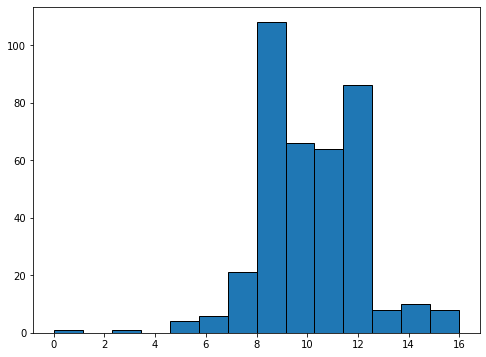

In [129]:
#import scipy.stats as stats
#education_level_sample_df = df['EducationLevel'].sample(n = 40)
#results = stats.ttest_1samp(education_level_sample_df, df['EducationLevel'].mean())
#results.confidence_interval(0.95)
plt.figure(figsize = (8,6))
plt.hist(df['EducationLevel'], bins = len(df['EducationLevel'].value_counts()), edgecolor = 'black')

In [131]:
# Construct the confidence interval
education_level_sample_df = df['EducationLevel'].sample(n = 40)

x_bar = df['EducationLevel'].mean()
mu = education_level_sample_df.mean()
sample_std = education_level_sample_df.std()
n = 40

CI = stats.t.interval(alpha=0.95,loc = mu, scale = sample_std, df= n - 1)
print(CI)

(6.393096504924346, 14.956903495075656)


Interpret the confidence interval in the code block below (commented out).

In [132]:
# Interpretation
# After conducting this sampling, we can conclude with 95% confidence that the mean is somewhere in that range of CI. 

#### Hypothesis Test

Now perform a hypothesis test for your chosen variable at the level of significance you chose above.

In [135]:
# Perform the hypothesis test
result = stats.ttest_1samp(education_level_sample_df, x_bar)
t_stat, p_value = result
result

Ttest_1sampResult(statistic=1.4705941000394105, pvalue=0.14942362194635955)

Draw the appropriate conclusion for the hypothesis test and justify your answer in the code block below (commented out).

In [136]:
# Conclusion
# The p-value is 0.149, which is greater than the aplha, which is 0.05, therefore we fail to reject Ho and 
# the mean of the sample is not different from the mean of the data. 

### Two means

Now pick a variable that you can perform statistical inference on two (independent) sample means using the t-distribution.

In the code block below please respond to all of the following (commented out):

*   What are the variables you chose?
*   How do you know it is appropriate for statistical inference on two (independent)means using the t-distribution?
*   You'll be asked to contruct and interpret a confidence interval. What is the level of confidence that you'll pick?
*   You'll be asked to perform a hypothesis test.
  *   What are the null and alternative hypotheses?
  *   What is the level of significance?

In [137]:
# Responses to questions
#What are the variables you chose?'
#We will choose FemaleVictim and MaleVictim.
#How do you know it is appropriate for statistical inference on two (independent)means using the t-distribution?'
#It is appropiate because the dataset is a sample itsel of observations, then we will choose a sample from the data.'
#It is also appropiate because we do not know the standard deviation of the population'
#Youll be asked to contruct and interpret a confidence interval. What is the level of confidence that youll pick?'
# We will pick a confident interval of 95%'
#Youll be asked to perform a hypothesis test.'
#What are the null and alternative hypotheses?'
#   ' Ho: The mean of the sample is not different from the mean of the data
#'    H1: The mean of the sample is different from the mean of the data.'
#   'What is the level of significance?'
#' Our significance level will be 0.05.'
# Response snippet: Education level with the null value at 0.
# Response snippet: Number of victims by previous crime (Yes or No)

#### Confidence Interval

Now construct a confidence interval for your chosen variables at the level of confidence you chose above.

In [138]:
# Construct the confidence interval
# Sample 1

female_victim_sample_df = df['FemaleVictim'].sample(n = 40)

x_bar = df['FemaleVictim'].mean()
mu = female_victim_sample_df.mean()
sample_std = female_victim_sample_df.std()
n = 40

CI = stats.t.interval(alpha=0.95,loc = mu, scale = sample_std, df= n - 1)
print(CI)

(-0.6792620567208684, 1.8792620567208682)


In [139]:
# Construct the confidence interval
# Sample 2

male_victim_sample_df = df['MaleVictim'].sample(n = 40)

x_bar = df['MaleVictim'].mean()
mu = male_victim_sample_df.mean()
sample_std = male_victim_sample_df.std()
n = 40

CI = stats.t.interval(alpha=0.95,loc = mu, scale = sample_std, df= n - 1)
print(CI)

(-0.9260619926277209, 2.526061992627721)


Interpret the confidence interval in the code block below (commented out).

In [ ]:
# Interpretation


#### Hypothesis Test

Now perform a hypothesis test for your chosen variable at the level of significance you chose above.

In [140]:
# Perform the hypothesis test

x_1 = female_victim_sample_df.mean()
x_2 = male_victim_sample_df.mean()
s_1_2 = female_victim_sample_df.std()
s_2_2 = male_victim_sample_df.std()
n_1 = len(female_victim_sample_df)
n_2 = len(male_victim_sample_df)
s_p_2 = ((n_1 - 1)*s_1_2 + (n_2 - 1 )* s_2_2)/(n_1 + n_2 -2)

t = (x_1 - x_2)/np.sqrt(s_p_2*(1/n_1 + 1/n_2))
t

-1.0377174016090551

In [142]:
print(s_1_2, s_2_2 )
stats.ttest_ind(female_victim_sample_df, male_victim_sample_df, equal_var=False)

0.6324555320336759 0.8533493588238807


Ttest_indResult(statistic=-1.190874392277296, pvalue=0.23761884877066225)

Draw the appropriate conclusion for the hypothesis test and justify your answer in the code block below (commented out).

In [143]:
# Conclusion
# The p-value is 0.2376, which is greater than the aplha, 0.05. Therefore, we fail to reject Ho, and conclude that
# The mean of the sample is not different from the mean of the data.

## Summary

Using a multivariate data set, you were able to pick variables to perform one and two sample t confidence intervals and t-tests.